# **ML Data Cleaning and Feature Selection**


Dataset : Air Quality Data Set (https://archive.ics.uci.edu/ml/datasets/Air+Quality)


I'm trying to predict Carbon monoxide(CO) in the air using data generated by Air Quality Chemical Multisensor Device. This device was placed in polluted city of Italy from march 2004 to February 2005 and data was recorded. I'm using Linear Regression and Random Forest to predict CO (Dependent Variable). Goal of this assignment is to identify independent variables for dependent variable(CO) and also clean dataset. 

### **Abstract:** Goal of this notebook is to identify independent variables for dependent variable(Carbon Monoxide) and also to learn more about data like check for missing values, range, Data Cleaning, etc. For, feature selection I used OLS (Ordinary Least Squares), Correlation Matrix. To understand and clean data I used various libraries like Matplot,Seaborn, Fitter and Pandas. I successfully performed these ML operations of Data Cleaning and Feature Selection and understood dataset more.

This dataset contains following Attributes.

1. Date (DD/MM/YYYY)
2. Time (HH.MM.SS)
3. CO = Carbon Monoxide
4. PT08.S1 = Tin Oxide
5. NMHC = Non Metanic HydroCarbons
6. C6H6 = Benzene
7. PT08.S2 = Titania
8. NOx = Nitrogen oxide
9. PT08.S3 = Tungsten Oxide (nominally NOx targeted)
10. NO2 = Nitrogen Dioxide
11. PT08.S4 = Tungsten Oxide (nominally NO2 targeted)
12. PT08.S5 = Indium Oxide
13. T = Temperature in °C
14. RH = Relative Humidity
15. AH = Absolute Humidity

**In this dataset Missing values are represented as -200**


In [ ]:
import pandas as pd 
import requests
import io
import numpy as np

#importing data is dataframe named df
df = pd.read_excel("https://raw.githubusercontent.com/SahilGadge/ML-Models-Assignment-1-Data-Sci-Engg-Methods/main/AirQualityUCI.xlsx")
df.shape #Get dimensions of dataframe

(9357, 15)

## **1.Which independent variables are useful to predict a target (dependent variable)?**

In [ ]:
#Missing values represented are by -200. So replacing -200 with NULL(NaN)
df.replace(to_replace= -200, value= np.NaN, inplace= True) 

#smf ols model do not accept variable names that contain = ().Therefore renaming the variable names
df.rename(columns={ "NOx(GT)": "NOx","CO(GT)": "CO", "C6H6(GT)": "C6H6", "NO2(GT)": "NO2","NMHC(GT)": "NMHC", "PT08.S1(CO)":"tinOxide","PT08.S2(NMHC)":"titania","PT08.S3(NOx)":"tungstenOxideNOx","PT08.S4(NO2)":"tungstenOxideNO2","PT08.S5(O3)":"indiumOxide"}, inplace=True)

df.shape #Dimentions of dataset

(9357, 15)

### Dropping Date and Time variables as they don't contribute towards CO(Carbon Monoxide) levels in air.

In [ ]:
import statsmodels.formula.api as smf #OLS model Library

#Loading dataset into ols
results = smf.ols('CO ~ tinOxide + NMHC + C6H6 + titania + NOx + tungstenOxideNOx + NO2 + tungstenOxideNO2 + indiumOxide + T + RH + AH', data=df).fit()
results.summary() #print results

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2629.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        01:52:29   Log-Likelihood:                 66.049
No. Observations:                 827   AIC:                            -106.1
Df Residuals:                     814   BIC:                            -44.77
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0945      0.409      2.675      0.008       0.291       1.898
tinOxide             0.0013      0.000      9.222      0.000       0.001       0.002
NMHC                 0.0008   9.63e-05      8.352      0.000       0.001       0.001
C6H6                 0.1482      0.012     12.194      0.000       0.124       0.172
titania             -0.0011      0.000     -2.692      0.007      -0.002      -0.000
NOx                  0.0046      0.000     13.315      0.000       0.004       0.005
tungstenOxideNOx    -0.0001      0.000     -0.959      0.338      -0.000       0.000
NO2                  0.0048      0.001      7.090      0.000       0.003       0.006
tungstenOxideNO2    -0.0006      0.000     -2.749      0.006      -0.001      -0.000
indiumOxide         -0.0006   6.39e-05     -8.838      0.000      -0.001      -0.000
T                   -0.0450      0.008     -5.789      0.000      -0.060      -0.030
RH                  -0.0098      0.003     -3.637      0.000      -0.015      -0.005
AH                   0.7682      0.183      4.187      0.000       0.408       1.128
==============================================================================
Omnibus:                       86.348   Durbin-Watson:                   0.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.795
Skew:                           0.529   Prob(JB):                     1.90e-53
Kurtosis:                       5.435   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Removing insignificant features (P-Value > 0.05) = tungstenOxideNOx

In [ ]:
results = smf.ols('CO ~ tinOxide + NMHC + C6H6 + titania + NOx + NO2 + tungstenOxideNO2 + indiumOxide + T + RH + AH', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2868.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        01:52:29   Log-Likelihood:                 65.582
No. Observations:                 827   AIC:                            -107.2
Df Residuals:                     815   BIC:                            -50.55
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7695      0.229      3.358      0.001       0.320       1.219
tinOxide             0.0013      0.000      9.500      0.000       0.001       0.002
NMHC                 0.0008   9.39e-05      8.775      0.000       0.001       0.001
C6H6                 0.1402      0.009     15.777      0.000       0.123       0.158
titania             -0.0008      0.000     -3.312      0.001      -0.001      -0.000
NOx                  0.0046      0.000     13.406      0.000       0.004       0.005
NO2                  0.0048      0.001      7.050      0.000       0.003       0.006
tungstenOxideNO2    -0.0006      0.000     -2.704      0.007      -0.001      -0.000
indiumOxide         -0.0005   6.16e-05     -8.908      0.000      -0.001      -0.000
T                   -0.0465      0.008     -6.094      0.000      -0.061      -0.031
RH                  -0.0103      0.003     -3.885      0.000      -0.016      -0.005
AH                   0.8243      0.174      4.741      0.000       0.483       1.166
==============================================================================
Omnibus:                       85.484   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.593
Skew:                           0.530   Prob(JB):                     6.94e-52
Kurtosis:                       5.391   Cond. No.                     8.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ans.= From data gathered using OLS Regression Results and correlation chart above 'tinOxide', 'NMHC', 'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH' are useful independent variables for predicting 'CO'(Carbon Monoxide) dependent variable. Because all of them have P-Value of 0.000, also these independent variables have correlation with dependent variable 'CO' as shown in chart above. However variable like 'tungstenOxideNOx' have higher P-value therefore they are not useful for prediction of 'CO'(Carbon Monoxide).

# **2. Which independent variables have missing data? How much?**

*** Missing Values Count ***


Variable       Count

tinOxide             366
NMHC                8443
C6H6                 366
titania              366
NOx                 1639
NO2                 1642
tungstenOxideNO2     366
indiumOxide          366
T                    366
RH                   366
AH                   366
dtype: int64

Dimention of Dataset: 
(9357, 15)

Yellow Represent Missing values in each independent variable: 


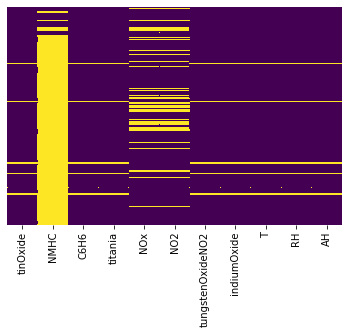

In [ ]:

print('*** Missing Values Count ***\n')

print('\nVariable       Count\n')
#isna function return missing values in that coloumn
print(df[['tinOxide', 'NMHC', 'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH']].isna().sum())

print('\nDimention of Dataset: ')
print(df.shape)

#seaborn library is used to visualize the data and heatmap helps visualize correlation in data
import seaborn as sns
sns.heatmap(df[['tinOxide', 'NMHC', 'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH']].isnull(),yticklabels=False,cbar=False,cmap='viridis')
print('\nYellow Represent Missing values in each independent variable: ')


In [ ]:
%%capture
#this library can be used for validation as well as visualization of data 
!pip install -q tensorflow_data_validation[visualization]
#after installation in colab this library requires restart of runtime 

## Please restart the runtime

If using Google Colab, the first time that you run the cell above, you must restart the runtime (Runtime > Restart runtime ...). Because Colab loads packages differently.

In [ ]:
#If this code throws error please restart runtime (kernel)
import tensorflow_data_validation as tfdv
#!pip install -q tensorflow_model_analysis
import pandas as pd
import numpy as np

df = pd.read_excel("https://raw.githubusercontent.com/SahilGadge/ML-Models-Assignment-1-Data-Sci-Engg-Methods/main/AirQualityUCI.xlsx")
df.rename(columns={ "NOx(GT)": "NOx","CO(GT)": "CO", "C6H6(GT)": "C6H6", "NO2(GT)": "NO2","NMHC(GT)": "NMHC", "PT08.S1(CO)":"tinOxide","PT08.S2(NMHC)":"titania","PT08.S3(NOx)":"tungstenOxideNOx","PT08.S4(NO2)":"tungstenOxideNO2","PT08.S5(O3)":"indiumOxide"}, inplace=True)
#Missing values represented are by -200. So replacing -200 with NULL(NaN)
df.replace(to_replace= -200, value= np.NaN, inplace= True) 

print('TFDV version: {}'.format(tfdv.version.__version__))
#visualize data
data = tfdv.generate_statistics_from_dataframe(df[['tinOxide', 'NMHC', 'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH']])
tfdv.visualize_statistics(data)

TFDV version: 1.3.0


### **Ans.=** All independent variables 'tinOxide', 'NMHC', 'C6H6', 'titania', 'NOx', 'NO2','indiumOxide','RH' have missing values as following.

1.   tinOxide = 366 (3.91%)
2.   NMHC = 8443 (90.23%)
3.   C6H6 = 366 (3.91%)
4.   titania = 366 (3.91%)
5.   NOx = 1639 (17.52%)
6.   NO2 = 1642 (17.55%)
7.   tungstenOxideNO2 = 366 (3.91%)
9.   indiumOxide = 366 (3.91%)
8.   T =  366 (3.91%)
9.   RH = 366 (3.91%)
10.  AH =  366 (3.91%)

Independent Variable 'NMHC' is missing 90.23% of it's data. Therefore we can remove this variable as it is not contributing much in predicting dependent variable 'CO'. 

Remaning independent variables = **'tinOxide', 'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH'**


## **3. Do the training and test sets have the same data?**

In [ ]:
#Splitting data in training and testing datasets

train=df.sample(frac=0.8,random_state=200) #80% of data in train set
test=df.drop(train.index) #remaining data in test set

#visualize train
train = tfdv.generate_statistics_from_dataframe(train[['tinOxide', 'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH','CO']])
#visualize test
test = tfdv.generate_statistics_from_dataframe(test[['tinOxide',  'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH','CO']])

#plot train and test together
tfdv.visualize_statistics(lhs_statistics=test, rhs_statistics=train,
                          lhs_name='TESTING_DATA', rhs_name='TRAINING_DATA')

### **Ans.=** As we can see in the above evaluation both training and testing dataframes don't have the same data. But if we observe histogram both training and testing dataframe have same distribution that is because of the random splitting of the data in training and testing data sets. Also, from the chart above we can infer that values in the testing data sets are different from training data as coloumns like 'missing', 'min', 'max', 'mean' and 'median' have **different values**.

# **4.Is the predictor variables independent of all the other predictor variables?**

,tinOxide,C6H6,titania,NOx,NO2,tungstenOxideNO2,indiumOxide,T,RH,AH
tinOxide,1.000000,0.883821,0.892972,0.713687,0.641696,0.682874,0.899326,0.048628,0.114607,0.135323
C6H6,0.883821,1.000000,0.981962,0.718914,0.614753,0.765717,0.865727,0.198891,-0.061643,0.167909
titania,0.892972,0.981962,1.000000,0.704483,0.646520,0.777235,0.880590,0.241330,-0.090352,0.186906
NOx,0.713687,0.718914,0.704483,1.000000,0.763170,0.233777,0.787056,-0.269713,0.221022,-0.149279
NO2,0.641696,0.614753,0.646520,0.763170,1.000000,0.157678,0.708259,-0.186369,-0.091845,-0.334798
tungstenOxideNO2,0.682874,0.765717,0.777235,0.233777,0.157678,1.000000,0.591137,0.561333,-0.032188,0.629644
indiumOxide,0.899326,0.865727,0.880590,0.787056,0.708259,0.591137,1.000000,-0.027193,0.124952,0.070738
T,0.048628,0.198891,0.241330,-0.269713,-0.186369,0.561333,-0.027193,1.000000,-0.578569,0.656471
RH,0.114607,-0.061643,-0.090352,0.221022,-0.091845,-0.032188,0.124952,-0.578569,1.000000,0.167971
AH,0.135323,0.167909,0.186906,-0.149279,-0.334798,0.629644,0.070738,0.656471,0.167971,1.000000


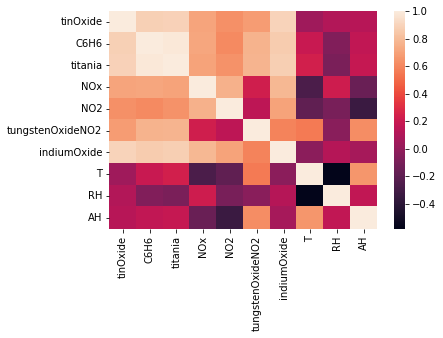

In [ ]:
#visualize the correlation matrix using seaborn
import seaborn as sns
sns.heatmap(df[['tinOxide', 'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH']].corr())

#print correlation matrix
df[['tinOxide', 'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH']].corr()

**Ans.=** From above results we can infer that independent variable **'C6H6'** is highly correlated with multiple other independent vatiables as follows

### Taking corr() = 0.8-1  as very strong correlation and such variables are highly dependent on each other

1.   **'C6H6'** have 0.981962 correlation with **'titania'**
2.   **'C6H6'** have 0.883821 correlation with **'tinOxide'**
3.   **'C6H6'** have 0.865727 correlation with **'indiumOxide'**

These are the only variables which have such high dependence on each other and therefore we can drop **'titania', 'tinOxide', 'indiumOxide'** and only keep **'C6H6'**.

Remaning independent variables = **'tungstenOxideNO2', 'AH', 'RH', 'T', 'NO2', 'NOx', 'C6H6'**








# **5. Which predictor variables are the most important?**

CO                  1.000000
C6H6                0.931091
NOx                 0.795054
NO2                 0.683533
tungstenOxideNO2    0.630700
RH                  0.048896
AH                  0.048555
T                   0.022113
Name: CO, dtype: float64


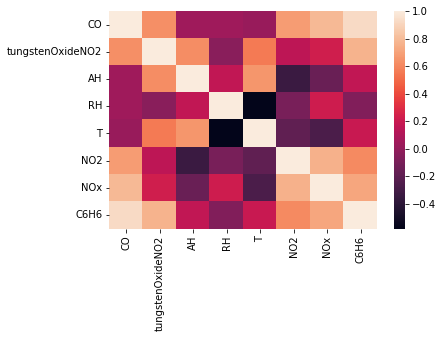

In [ ]:
print(df[['CO','tungstenOxideNO2', 'AH', 'RH', 'T', 'NO2', 'NOx', 'C6H6']].corr()['CO'].sort_values(ascending=False))

#correlation
corr = df[['CO','tungstenOxideNO2', 'AH', 'RH', 'T', 'NO2', 'NOx', 'C6H6']].corr()
sns.heatmap(corr) #correlation heatmap

**Ans.=** From above results we can infer that **'C6H6' , 'NOx' , 'NO2' , 'tungstenOxideNO2  '** are most important independent variable for prediction of 'CO' (dependent variable) because each variable have correlation score above 0.6. And independent variables like **'RH', 'AH' and 'T'** are comparatively less important as they have less correlation score.

# **6. Do the ranges of the predictor variables make sense?**

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("https://raw.githubusercontent.com/SahilGadge/ML-Models-Assignment-1-Data-Sci-Engg-Methods/main/AirQualityUCI.csv",sep=";", decimal=",")
data.replace(to_replace= -200, value= np.NaN, inplace= True)
data.rename(columns={ "NOx(GT)": "NOx","CO(GT)": "CO", "C6H6(GT)": "C6H6", "NO2(GT)": "NO2","NMHC(GT)": "NMHC", "PT08.S1(CO)":"tinOxide","PT08.S2(NMHC)":"titania","PT08.S3(NOx)":"tungstenOxideNOx","PT08.S4(NO2)":"tungstenOxideNO2","PT08.S5(O3)":"indiumOxide"}, inplace=True)
data = data[['tungstenOxideNO2', 'AH', 'RH', 'T', 'NO2', 'NOx', 'C6H6']]

#Get information about data
data.describe()


,tungstenOxideNO2,AH,RH,T,NO2,NOx,C6H6
count,8991.000000,8991.000000,8991.000000,8991.000000,7715.000000,7718.000000,8991.000000
mean,1456.264598,1.025530,49.234201,18.317829,113.091251,246.896735,10.083105
std,346.206794,0.403813,17.316892,8.832116,48.370108,212.979168,7.449820
min,551.000000,0.184700,9.200000,-1.900000,2.000000,2.000000,0.100000
25%,1227.000000,0.736800,35.800000,11.800000,78.000000,98.000000,4.400000
50%,1463.000000,0.995400,49.600000,17.800000,109.000000,180.000000,8.200000
75%,1674.000000,1.313700,62.500000,24.400000,142.000000,326.000000,14.000000
max,2775.000000,2.231000,88.700000,44.600000,340.000000,1479.000000,63.700000


In [ ]:
#Calculate range of the variables
minMax = data[['tungstenOxideNO2', 'AH', 'RH', 'T', 'NO2', 'NOx', 'C6H6']].agg(['min','max'])
minMax.loc['range'] = minMax.loc['max'] - minMax.loc['min']
minMax

,tungstenOxideNO2,AH,RH,T,NO2,NOx,C6H6
min,551.0,0.1847,9.2,-1.9,2.0,2.0,0.1
max,2775.0,2.2310,88.7,44.6,340.0,1479.0,63.7
range,2224.0,2.0463,79.5,46.5,338.0,1477.0,63.6


**Ans.=** From results above it is clear that range of the predictor variable does make sense. As there are no unrealistic values or outliers in the data. As we already replaced missing values which were denoted by -200 by NaN. Also dataset is based on the data generated by the device placed in city, therefore there is no chance for human error.

# **7. What are the distributions of the predictor variables?**

In [ ]:
%%capture
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div
norm,7.180158e-07,1736.737891,-209029.318146,inf
lognorm,9.040291e-07,1715.645545,-206948.957153,inf
gamma,9.133148e-07,1715.712048,-206857.078008,inf
cauchy,2.652602e-06,1689.190939,-197279.836356,inf
rayleigh,4.765874e-06,1624.795372,-192011.650963,inf


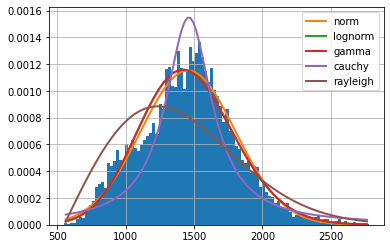

In [ ]:
#fitter does not accept null values
PT = data['tungstenOxideNO2'].dropna().values
#Get distribution algorithms and fit variable
f = Fitter(PT,distributions=get_common_distributions())
f.fit()
f.summary()

Variable tungstenOxideNO2 have normal distribution

,sumsquare_error,aic,bic,kl_div
exponpow,1.481141,235.768253,-78294.787997,inf
lognorm,1.514004,230.184528,-78097.482047,inf
chi2,1.519526,228.408977,-78064.745710,inf
gamma,1.519527,228.409017,-78064.738816,inf
rayleigh,1.639413,213.951775,-77391.073135,inf


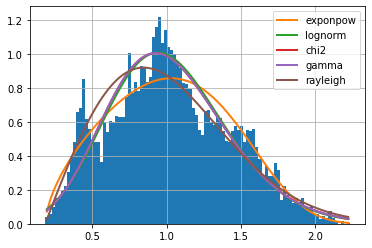

In [ ]:
PT = data['AH'].dropna().values
f = Fitter(PT,distributions=get_common_distributions())
f.fit()
f.summary()

Variable AH have Exponetial Power distribution

,sumsquare_error,aic,bic,kl_div
exponpow,0.000302,928.863506,-154707.577293,0.015948
norm,0.000665,934.002866,-147604.625334,0.032564
gamma,0.000674,936.032450,-147479.434282,0.032890
lognorm,0.000686,936.277453,-147317.883552,0.033266
chi2,0.000745,936.281922,-146583.969163,0.035578


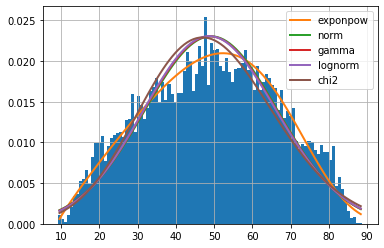

In [ ]:
PT = df['RH'].dropna().values
f = Fitter(PT,distributions=get_common_distributions())
f.fit()
f.summary()

Variable RH have Exponetial Power distribution

,sumsquare_error,aic,bic,kl_div
chi2,0.001704,860.827465,-139144.326571,inf
gamma,0.001704,860.827512,-139144.318824,inf
lognorm,0.001747,860.816358,-138920.033569,inf
norm,0.002211,866.225610,-136808.944745,inf
rayleigh,0.002875,830.381339,-134449.021432,inf


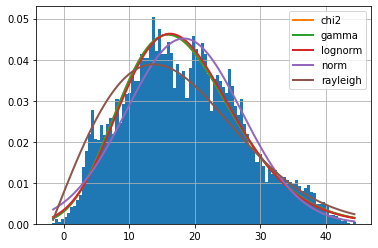

In [ ]:
PT = df['T'].dropna().values
f = Fitter(PT,distributions=get_common_distributions())
f.fit()
f.summary()

Variable T have Chi2 distribution

,sumsquare_error,aic,bic,kl_div
gamma,0.000040,1391.092177,-147239.433044,inf
chi2,0.000040,1391.092241,-147239.431221,inf
norm,0.000073,1512.636171,-142498.232894,inf
rayleigh,0.000112,1336.910600,-139229.373994,inf
cauchy,0.000167,1343.429271,-136133.674122,inf


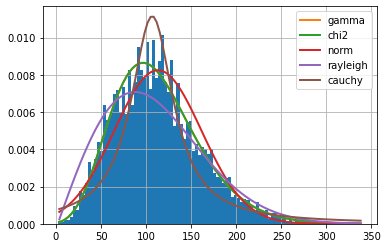

In [ ]:
PT = df['NO2'].dropna().values
f = Fitter(PT,distributions=get_common_distributions())
f.fit()
f.summary()

Variable NO2 have gamma distribution

,sumsquare_error,aic,bic,kl_div
chi2,0.000004,1787.685357,-165140.540054,inf
gamma,0.000004,1787.635651,-165138.175512,inf
cauchy,0.000019,1787.903564,-152790.265487,inf
expon,0.000021,1707.304163,-152348.532189,inf
exponpow,0.000023,1876.227554,-151491.219583,inf


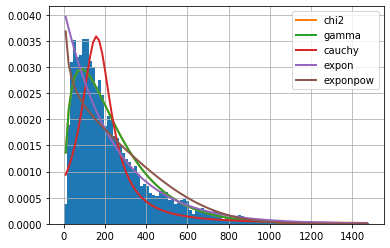

In [ ]:
PT = df['NOx'].dropna().values
f = Fitter(PT,distributions=get_common_distributions())
f.fit()
f.summary()

Variable NOx have Chi2 distribution

,sumsquare_error,aic,bic,kl_div
gamma,0.000490,1244.055184,-150350.160084,inf
chi2,0.000490,1244.053667,-150349.831127,inf
lognorm,0.001178,1162.738499,-142461.122773,inf
exponpow,0.005874,1779.681098,-128015.486642,inf
rayleigh,0.006676,1751.418159,-126873.746365,inf


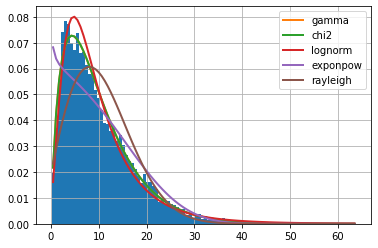

In [ ]:
PT = df['C6H6'].dropna().values
f = Fitter(PT,distributions=get_common_distributions())
f.fit()
f.summary()

Variable C6H6 have gamma distribution

**Ans.=** Fitter - It is a python library to identify distribution of data. It uses total 80 distribution algorithm to check which of them fits best for given data. Also it requires data with no null values.

> From results above
Most important independent variables like 'C6H6', 'NOx', 'NO2' have gamma or chi square distribution. 


1.   'C6H6' have Gamma distribution
2.   'NOx' have Chi2 distribution
1.   'NO2' have Gamma distribution
1.   'T' have Chi2 distribution
2.   'RH' have Exponential power distribution
1.   'AH' have Exponential power distribution
2.   'tungstenOxideNO2' have Normal distribution






## **Conclusion**

I successfully performed these ML operations like Data Cleaning and Feature Selection and understood dataset more. From such operation I found following



1.  'tinOxide', 'NMHC', 'C6H6', 'titania', 'NOx', 'NO2', 'tungstenOxideNO2', 'indiumOxide', 'T','RH', 'AH' are useful independent variables for predicting 'CO'(Carbon Monoxide) dependent variable.

2.   Dataset does contain missing values and variable 'NMHC' contain 90% missing values so it was not useful for prediction.

3. Training and testing dataset does have different data.

4. Independent variables like **'titania', 'tinOxide', 'indiumOxide'** were highly correlated with **'C6H6'** and therefore not contributing much towards prediction of 'CO' so we droped them.

5.   **'C6H6' , 'NOx' , 'NO2' , 'tungstenOxideNO2'** these predictor variables are most important in order to predict 'CO' our dependent variable

6.   Range of Independent variables does makes sense and there are no unrealistic entries.

7.   Independent variables have Gamma, Chi2 and Exponential power distribution.










## **References**






1.   Fitter = https://fitter.readthedocs.io/en/latest/

1.   Stackoverflow = https://stackoverflow.com/
2.   Correlation = https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression

2.   pandas = https://pandas.pydata.org/docs/reference/index.html


1.  Descriptive_statistics = https://colab.research.google.com/drive/1ADG6Hmt6bmjRY1baTms71R2Pc0L-P_Hy#scrollTo=nm-2LPh7ekST




## **Copyright>  (Year:-2021) <Name:Sahil Sanjay Gadge>**



Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
